In [ ]:
# Exercise 1: Feature Selection with SelectKBest

In [3]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

select_k_best = SelectKBest(score_func = chi2, k = 2)
X_new = select_k_best.fit_transform(X, y)

mask = select_k_best.get_support()

selected_features = X.columns[mask]
print("Selected features:", selected_features)

Selected features: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


In [ ]:
# Exercise 2: Feature Importance with Random Forest

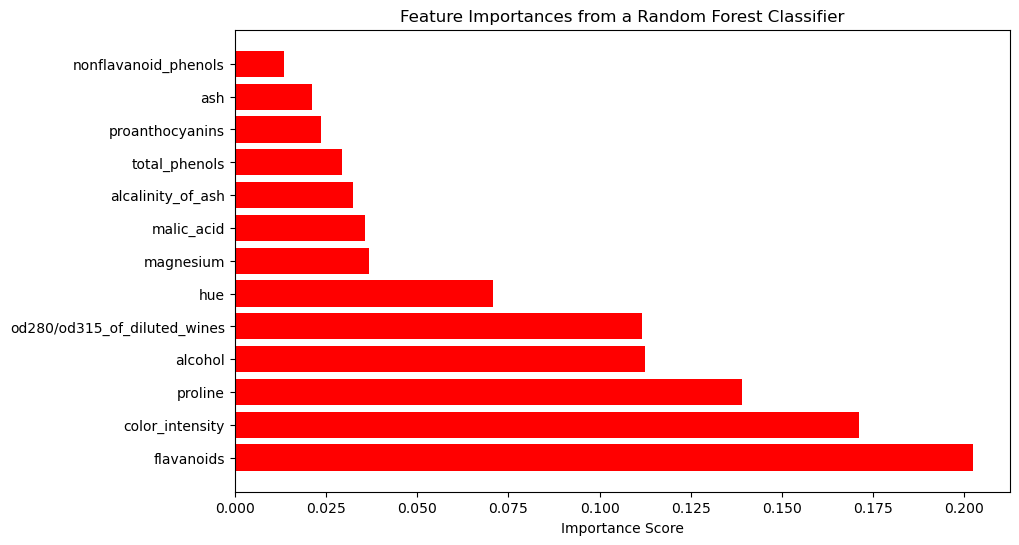

In [31]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

wine = load_wine()

X = pd.DataFrame(wine.data, columns = wine.feature_names)
y = wine.target

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)
rf_classifier = RandomForestClassifier(random_state = 42)
rf_classifier.fit (X_train, y_train)

importances = rf_classifier.feature_importances_
feature_importances = pd.DataFrame(importances, index = X.columns, columns = ["Importance"]).sort_values('Importance', ascending = False)

plt.figure(figsize = (10,6))
plt.barh(feature_importances.index, feature_importances['Importance'], color = 'red')
plt.xlabel('Importance Score')
plt.title('Feature Importances from a Random Forest Classifier')
plt.show()

In [ ]:
# Exercise 3: Recursive Feature Elimination (RFE)

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)
svm = SVC(kernel = "linear")
rfe = RFE(estimator = svm, n_features_to_select = 10)
rfe.fit(X_train, y_train)

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

svm.fit(X_train_rfe, y_train)

y_pred = svm.predict (X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of the SVM model with RFE-selected features: ", accuracy.)

# selected_features = rfe.get_support()
# print("Selected features (True means selected): ", selected_features)

selected_features_names = [name for name, selected in zip (cancer.feature_names, selected_features) if selected]
print("Selected features are: ", selected_features_names)

Accuracy of the SVM model with RFE-selected features:  0.9736842105263158
Selected features are:  ['mean radius', 'mean concavity', 'mean concave points', 'texture error', 'worst radius', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']


In [ ]:
# Exercise 4: L1 Regularization for Feature Selection

In [35]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

diabetes_data = load_diabetes()
X = diabetes_data.data
y = diabetes_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)

selected_features = lasso.coef_ != 0
print("Selected features: ", selected_features)

X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

model = LinearRegression()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with selected features: ", mse)

Selected features:  [False  True  True  True  True False  True False  True  True]
Mean Squared Error with selected features:  2828.902162370408


In [ ]:
# Classification Exercises
# Exercise 1: Logistic Regression

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

iris_data = load_iris()
X = iris_data.data
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
logreg = LogisticRegression(max_iter = 200)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(conf_matrix)

Accuracy:  1.0
Confusion Matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
# Exercise 2: Support Vector Machine (SVM)

In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

breast_cancer_data = load_breast_cancer()
X = breast_cancer_data.data
y = breast_cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.956140350877193
Confusion Matrix:
[[39  4]
 [ 1 70]]


In [ ]:
# Exercise 3: Decision Tree Classifier

Accuracy:  0.9444444444444444


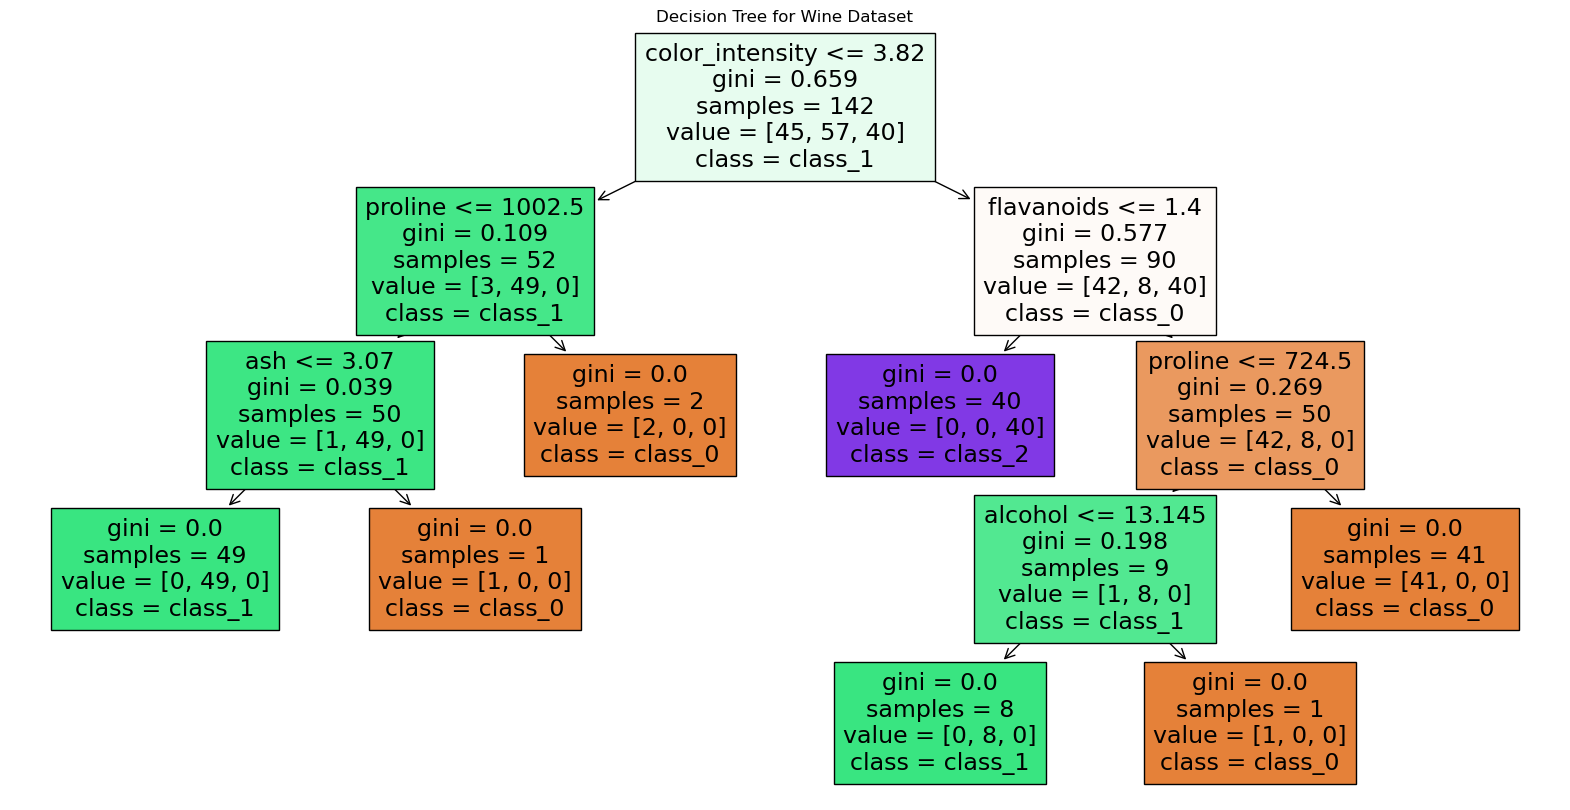

In [45]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

wine_data = load_wine()
X = wine_data.data
y = wine_data.target

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)

tree_model = DecisionTreeClassifier(random_state = 42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

plt.figure (figsize = (20,10))
plot_tree(tree_model, feature_names = wine_data.feature_names, class_names = wine_data.target_names, filled = True)
plt.title("Decision Tree for Wine Dataset")
plt.show()

In [ ]:
# Regression Exercises
# Exercise 1: Linear Regression

In [57]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

boston_data = fetch_openml(name="boston", version=1, as_frame=True)
X = boston_data.data  # Features
y = boston_data.target  # Target (house prices)

print("Data types in X:\n", X.dtypes)
print("Data type of y:", y.dtype)

y = pd.to_numeric(y, errors='coerce')  # Convert to numeric and coerce errors to NaN
print("Data type of y after conversion:", y.dtype)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


Data types in X:
 CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object
Data type of y: float64
Data type of y after conversion: float64


TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
# Exercise 2: Ridge Regression

In [59]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

diabetes_data = load_diabetes()
X = diabetes_data.data 
y = diabetes_data.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 3077.41593882723
R-squared score: 0.41915292635986545


In [ ]:
# Exercise 3: Decision tree Regression

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

boston_data = fetch_openml(name="boston", version=1, as_frame=True)
X = boston_data.data  # Features
y = boston_data.target  # Target (house prices)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

y_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.figure(figsize=(20,10))  # Set figure size for better readability
plot_tree(tree_regressor, feature_names=boston_data.feature_names, filled=True)
plt.title("Decision Tree Regressor for Boston Housing Dataset")
plt.show()

Mean Squared Error: 11.142843137254903
